# Logistic Regression Exercise

This exercise will guide you in implementing a Linear Model for classification namely, Logistic Regression, to gain intuitions and develop a deeper understanding of classification models. These concepts will form as the foundation for more complex models later on.

**You will learn to:**
- Build the general architecture of a Logistic Regression Model.
    - Initializing Parameters/Weights
    - Implement the activation function that maps your raw scores to probabilities.
    - Calculating the Cost/Loss/Objective Function
    - Computing for the gradients of the Loss function with respect to the parameters
    - Implement gradient descent to update the paramters

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import h5py

plt.style.use('ggplot')

# Fix the seed of the random number 
# generator so that your results will match ours
np.random.seed(1)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
# load the data
data = h5py.File("cat_dataset.hdf5")

train_images = data["train_x"]
y_train = np.array(data["train_y"])
test_images = data["test_x"]
y_test = np.array(data["test_y"])

num_train, H, W, C = train_images.shape
num_test,_,_,_ = test_images.shape

print("Train images shape =", train_images.shape)
print("Train labels shape =", y_train.shape)
print("Test images shape =", test_images.shape)
print("Test labels shape =", y_test.shape)

Train images shape = (209, 64, 64, 3)
Train labels shape = (209, 1)
Test images shape = (50, 64, 64, 3)
Test labels shape = (50, 1)


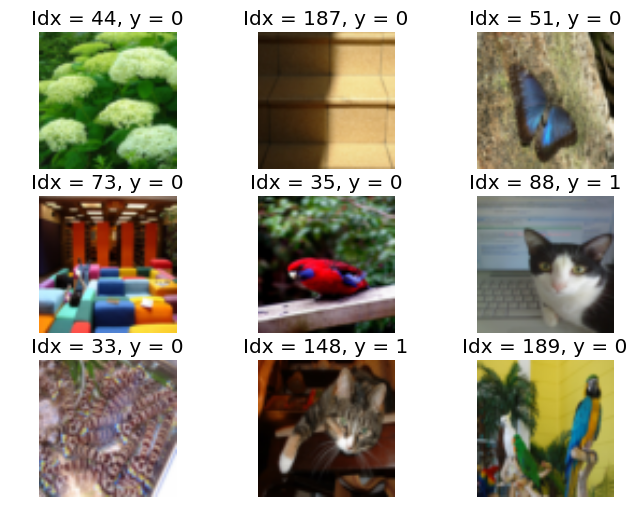

In [18]:
# Display random images in the training data
randIdx = np.arange(num_train)
np.random.shuffle(randIdx)
plt.figure(figsize=(8,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[randIdx[i]])
    plt.axis('off')
    plt.title("Idx = " + str(randIdx[i]) +", y = " + str(np.squeeze(y_train[randIdx[i]])))

In [19]:
X_train = np.reshape(train_images,[num_train,-1])
X_test = np.reshape(test_images,[num_test,-1])

print("X_train shape =",X_train.shape)
print("X_test shape =",X_test.shape)

X_train shape = (209, 12288)
X_test shape = (50, 12288)


**Open `logistic_regression.py` and fill in the missing codes **

In [20]:
from logistic_regression import LogisticRegression

In [ ]:
classifier = LogisticRegression()
loss_history = classifier.train(X_train, y_train, learning_rate=5e-3, num_iters=2000, batch_size=209, verbose=True, reg=0)

iteration 0 / 2000: loss 0.880910
iteration 100 / 2000: loss 0.610383
iteration 200 / 2000: loss 0.501101
iteration 300 / 2000: loss 0.480649
iteration 400 / 2000: loss 0.316166
iteration 500 / 2000: loss 0.289674


In [ ]:
Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)
print("Train accuracy: {} %".format(100 - np.mean(np.abs(Y_train_pred - y_train)) * 100))
print("Test accuracy: {} %".format(100 - np.mean(np.abs(Y_test_pred - y_test)) * 100))

In [ ]:
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")

In [ ]:
print("Weights =", classifier.params["W"][0:5])
print("bias =",classifier.params["b"])

In [ ]:
classes = ["not cat", "cat"]

prediction = classifier.predict(X_test[0])
plt.imshow(test_images[4])
plt.axis('off')
plt.title("y = " + classes[(np.squeeze(y_test[0]))] + " | prediction =" + classes[np.squeeze(prediction)])